# Background 

An e-commerce company wants to analyse its Customer by using their internal customer data that was gathered during 2012-2014. Those data consist of 4 major categories which follows the Marketing 4Ps, they are People, Product, Promotion and Place.

This Analysis consist of these sections, which will be presented by given order: Data Understanding and Cleaning, Data Analysis - Customer Background Overview, Data Analysis - Marketing Campaign and Key Takeaways.

The goal of this analysis is to improve the current marketing campaign effectiveness and efficiency through suggestion based on the findings of their customer's background.

# Problem Statement

The company wants to see the results of their marketing campaign during 2012-2014, through this infromation and historical data they want to improve their marketing campaign to be more efficient and effective.

As a Data Analyst, we would like to answer this following question:

How is the performance of the existing marketing campaign? and How to improve the effectiveness and efficiency of the marketing campaign?

# Data

Link to the Customer Personality Analysis Data [Source](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount).



In [1504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, skew
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import  ttest_ind, ttest_1samp, f_oneway, shapiro

import warnings
warnings.filterwarnings("ignore")

This Dataset is categorised by People, Products, Promotion, Place as in the 4Ps Marketing Mix, the details of columns in each category:

**People**
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1505]:
df=pd.read_csv('marketing_campaign.csv', sep = '\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


# Data Understanding and Cleaning

The first step of this process is understanding the data by checking their types, thier size (number of columns and rows), null values and etc. In this process, we would like to investigate the anomaly from the dataset. Furthermore, in Data Cleaning process we would treat those anomaly based on the analysis, while also provide the explanation for the given treatment.

First, we will start by checking their data types and the size of the data:

In [1506]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [1507]:
multi_table([pd.DataFrame(df[col].value_counts()) for col in df.columns])

,ID
5524,1
6885,1
3478,1
7494,1
1763,1
...,...
5682,1
5564,1
6516,1
6255,1


In [1508]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [1509]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].max(),df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name','Max','Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Max,Number of Unique,Unique Sample
0,ID,11191,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,1996,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,PhD,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,YOLO,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,666666.0,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,2,3,"[0, 1, 2]"
6,Teenhome,2,3,"[0, 1, 2]"
7,Dt_Customer,31-12-2013,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,99,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,1493,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55,

In [1510]:
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

From the Information that have been gathered so far, it can be summarized as below:

* Customer Personality Analysis consist of 29 columns and 2,240 rows
* Composition of data type: float64(1), int64(25), and object(3)
* From 25 int64 datatype, there area 7 columns which has boolean entry, which area: AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `Complain` dan `Response`
* `Income` column has 1.07% of null values entry
* `Education` and `Marital_Status` columns has several data entry which share the same meaning and/or definition
* `ID` column consist of Unique Number with the function of Primary Key, which will be removed as it will not be used in the analysis
* Column `Z_Revenue` and `Z_CostContact` will be removed as there is no explanation about those two column and there is only 1 unique value in those columns


<AxesSubplot: ylabel='Income'>

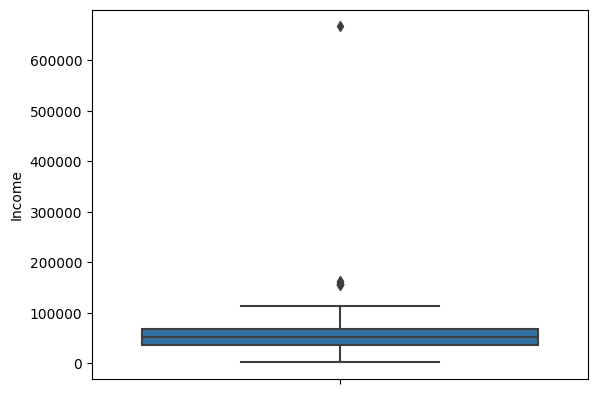

In [1511]:
sns.boxplot(data = df, y= 'Income')

Based on the graph above, it shows that for the outlier there are some customers who have income more than 600,000 - the population of these customers are really low and the disparity with the descriptive statistics (Median and/or Mean) are quite big. Thus it will be removed.
On the other, other outliers that are just above the standard deviation will not be standardized (IQR Method) as there is only a slight deviation and the population of those data (looking from the graph) is still in a relevant number.

From the Data understanding, it also shows that there is 1.07% columns in Income which has null values. Since the percentage is really small it will be removed.

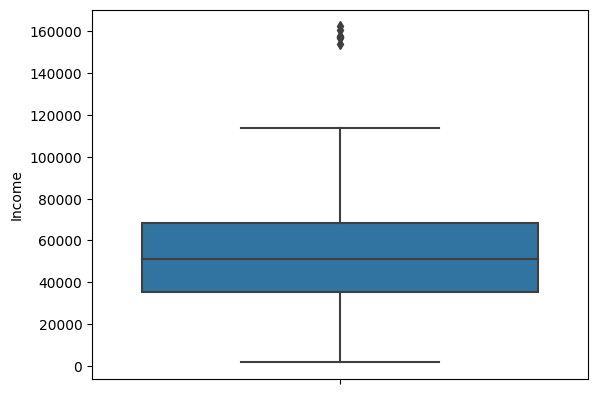

In [1512]:
df=df.dropna(subset=['Income'])
df=df[df['Income']<600000]
sns.boxplot(data = df, y= 'Income')
plt.show()

In [1513]:
def marital_status_cat(x):
    if x == 'Alone':
        return 'Single'
    elif x == 'YOLO':
        return 'Single'
    elif x == 'Absurd':
        return 'Single'
    elif x == 'Together':
        return 'Married'
    elif x == 'Widow':
        return 'Divorced'
    else:
        return x



In [1514]:
df['Marital_Status'] = df['Marital_Status'].apply(marital_status_cat)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


`Marital_Status` column adjusted and categorised by only 3 cateogries, which are: Single (YOLO, Alone, Absurd ), Married (Together), and Divorced (Widowed).

In [1515]:
def education_cat(x):
    if x == '2n Cycle':
        return 'Master'
    else:
        return x

In [1516]:
df['Education'] = df['Education'].apply(education_cat)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [1517]:
display((df['Education'].value_counts()/len(df))*100)


Graduation    50.338600
Master        25.507901
PhD           21.715576
Basic         2.437923 
Name: Education, dtype: float64

In `Education` Column the 2n cycle has been categorised as Master. So there are only 4 remaining categories, which are basic, graduation, master, and PhD.

In [1518]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [1519]:
df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.to_period('M')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,2012,2012-04
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,2014,2014-08
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,2013,2013-08
3,6182,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,2014,2014-10
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,2014,2014-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,2013,2013-06
2236,4001,1946,PhD,Married,64014.0,2,1,2014-10-06,56,406,...,0,0,1,0,0,3,11,0,2014,2014-10
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,2014,2014-01
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,2014,2014-01


In [1520]:
from operator import attrgetter
max_date = df['Month'].max()
calc_date = max_date - df['Month']
df['Customer_Age_M'] = calc_date.apply(attrgetter('n'))
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month,Customer_Age_M
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,2012,2012-04,32
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,2014,2014-08,4
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,2013,2013-08,16
3,6182,1984,Graduation,Married,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,2014,2014-10,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,2014,2014-01,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,2013,2013-06,18
2236,4001,1946,PhD,Married,64014.0,2,1,2014-10-06,56,406,...,0,1,0,0,3,11,0,2014,2014-10,2
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,2014,2014-01,11
2238,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,2014,2014-01,11


`Customer_Age_M` column shows the age of the customer in month based on the enrollment date.

In [1521]:
df['Age'] = 2014 - df['Year_Birth']

In [1522]:
df['Age'].sort_values(ascending=False).unique()



array([121, 115, 114,  74,  73,  71,  70,  69,  68,  67,  66,  65,  64,
        63,  62,  61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,
        50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,
        37,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,
        24,  23,  22,  21,  20,  19,  18])

In [1523]:
df[df['Age']>99]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year,Month,Customer_Age_M,Age
192,7829,1900,Master,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,1,3,11,0,2013,2013-09,15,114
239,11004,1893,Master,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,3,11,0,2014,2014-05,7,121
339,1150,1899,PhD,Married,83532.0,0,0,2013-09-26,36,755,...,0,0,0,3,11,0,2013,2013-09,15,115


In [1524]:
df=df[df['Age']<99]

In [1525]:
df['Age'].sort_values(ascending=False).unique()

array([74, 73, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57,
       56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40,
       39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23,
       22, 21, 20, 19, 18])

Make a new column called `Age`, the calculation is based on their age in 2014. There are several rows that will be removed as their age is above 99 years old, quite rare in todays era, and the population is only 3. Thus, it can be removed.

In [1526]:
df['Children'] = df['Kidhome'] + df['Teenhome']

New Column called `Children` it is a sum from `Kidhome` and `Teenhome`. And those two latter column will be removed to reduce level of redudancy.

In [1527]:
df.drop(columns=['ID','Z_CostContact', 'Z_Revenue','Kidhome','Teenhome'],inplace=True)

Unused Data: `ID`, `Z_CostContact`, `Z_Revenue`, `Kidhome` and `Teenhome`

# Cleaned Data

In [1528]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), (df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

#

(2212, 29)


,dataFeatures,dataType,null,unique,uniqueSample
0,Year_Birth,int64,0,56,"[1951, 1955]"
1,Education,object,0,4,"[Master, Basic]"
2,Marital_Status,object,0,3,"[Divorced, Single]"
3,Income,float64,0,1970,"[78710.0, 48904.0]"
4,Dt_Customer,datetime64[ns],0,662,"[2013-05-30T00:00:00.000000000, 2014-03-20T00:00:00.000000000]"
5,Recency,int64,0,100,"[22, 2]"
6,MntWines,int64,0,775,"[298, 291]"
7,MntFruits,int64,0,158,"[85, 8]"
8,MntMeatProducts,int64,0,553,"[1582, 83]"
9,MntFishProducts,int64,0,182,"[115, 90]"


The New Data has a total of 2,212 rows. (28 rows have been removed)

# Data Analysis

After Data Cleaning. We will gather information on the customer's background and further will analyse it with graph by adding and comparing the parameters. 
The goal is to get all the relevant parameters for analysing the marketing campaign and ultimately give a suggestion how to improve the campaign.

Customer's Background Overview

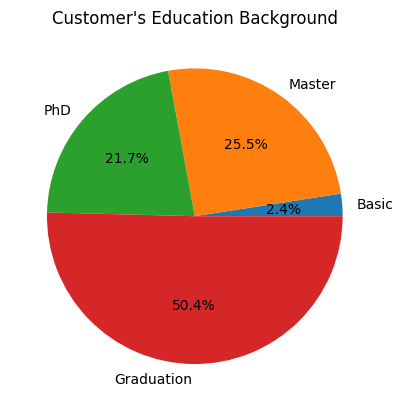

In [1529]:
l,a = list(set(df["Education"])),[]
for i in range(len(l)):
    a.append(df["Education"].to_list().count(l[i]))
    l[i] = l[i]
plt.pie(a,labels=l, autopct='%1.1f%%')
plt.title('Customer\'s Education Background')
plt.show()

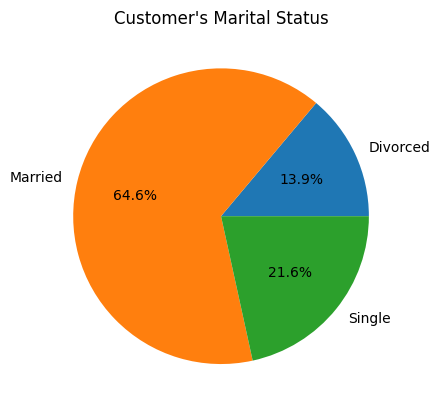

In [1530]:
l,a = list(set(df["Marital_Status"])),[]
for i in range(len(l)):
    a.append(df["Marital_Status"].to_list().count(l[i]))
    l[i] = l[i]
plt.pie(a,labels=l, autopct='%1.1f%%')
plt.title('Customer\'s Marital Status')
plt.show()

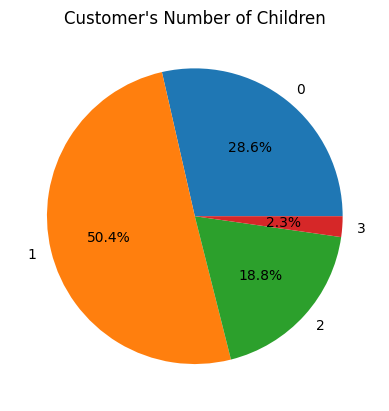

In [1531]:
l,a = list(set(df['Children'])),[]
for i in range(len(l)):
    a.append(df['Children'].to_list().count(l[i]))
    l[i] = l[i]
plt.pie(a,labels=l, autopct='%1.1f%%')
plt.title('Customer\'s Number of Children')
plt.show()

Text(0.5, 1.0, "Customer's Age Distribution")

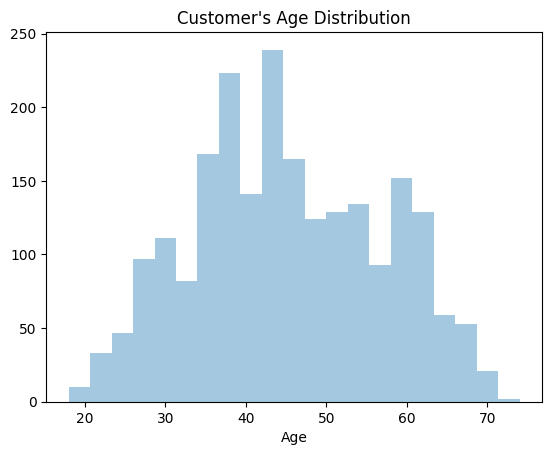

In [1532]:
sns.distplot(df['Age'],kde = False)
plt.title('Customer\'s Age Distribution')

In [1533]:
# cek distribusi kolom city_development_index
from scipy.stats import normaltest
stats, pval=normaltest(df['Age'])
if pval<=0.05:
    print('Non Normal Distribution') #Ha
else: 
    print('Normal Distribution') #Ho 

Non Normal Distribution


Text(0.5, 1.0, "Customer's Income Distribution")

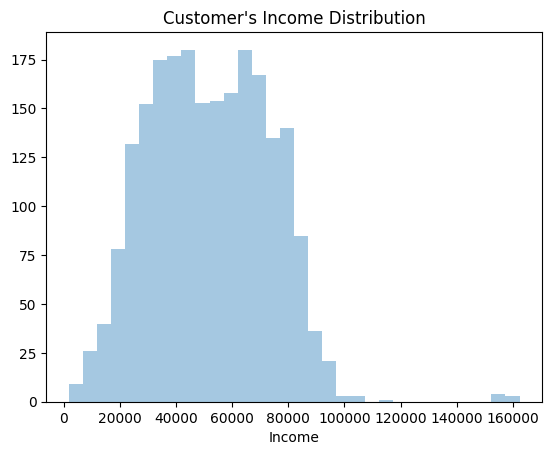

In [1534]:
sns.distplot(df['Income'], kde = False)
plt.title('Customer\'s Income Distribution')

In [1535]:
# cek distribusi kolom city_development_index
from scipy.stats import normaltest
stats, pval=normaltest(df['Income'])
if pval<=0.05:
    print('Non Normal Distribution') #Ha
else: 
    print('Normal Distribution') #Ho 

Non Normal Distribution


The distribtuion of Income can be categorised as Bimodal Distribution as it has two distinct local maxima.

Total Amount Spend Based on Background

In [1536]:
df['MntTotal'] = df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines']

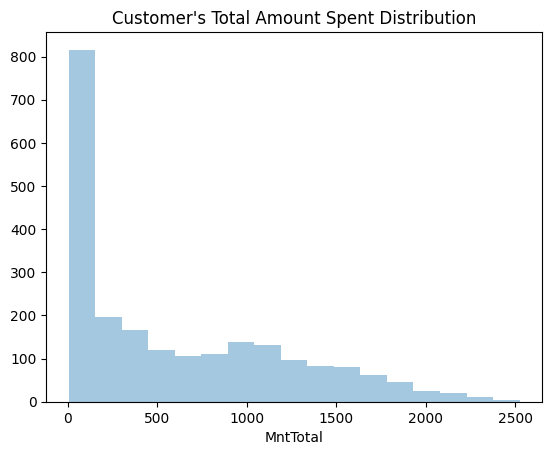

In [1537]:
sns.distplot(df['MntTotal'], kde = False)
plt.title('Customer\'s Total Amount Spent Distribution')
plt.show()

In [1538]:
# cek distribusi kolom city_development_index
from scipy.stats import normaltest
stats, pval=normaltest(df['MntTotal'])
if pval<=0.05:
    print('Non Normal Distribution') #Ha
else: 
    print('Normal Distribution') #Ho 

Non Normal Distribution


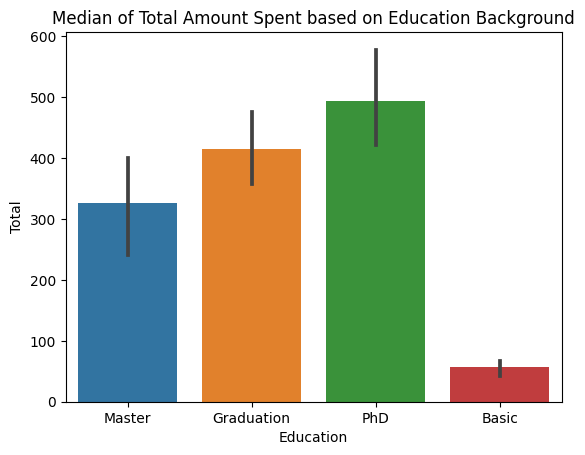

In [1539]:
sns.barplot(data=df.sort_values('MntTotal', ascending=False), y = 'MntTotal', x = 'Education', estimator = np.median)
plt.title('Median of Total Amount Spent based on Education Background')
plt.ylabel('Total')
plt.show()

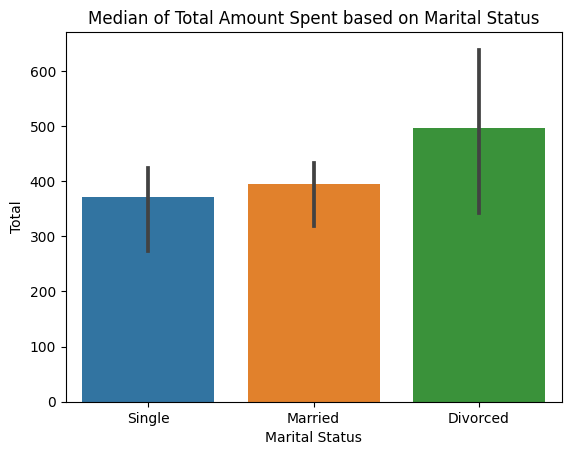

In [1540]:
sns.barplot(data=df.sort_values('MntTotal', ascending=False), y = 'MntTotal', x = 'Marital_Status', estimator = np.median)
plt.title('Median of Total Amount Spent based on Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total')
plt.show()

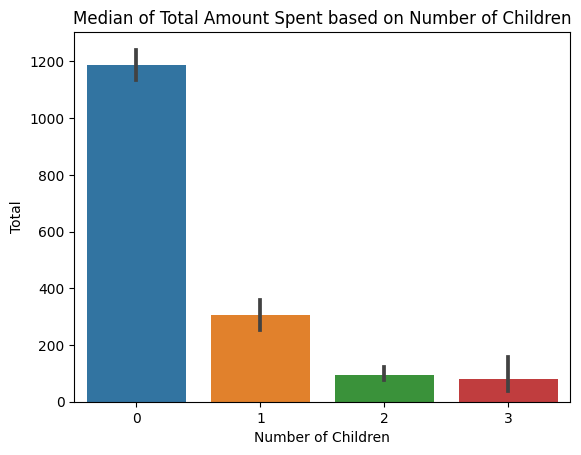

In [1541]:
sns.barplot(data=df.sort_values('MntTotal', ascending=False), y = 'MntTotal', x = 'Children', estimator = np.median)
plt.title('Median of Total Amount Spent based on Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Total')
plt.show()

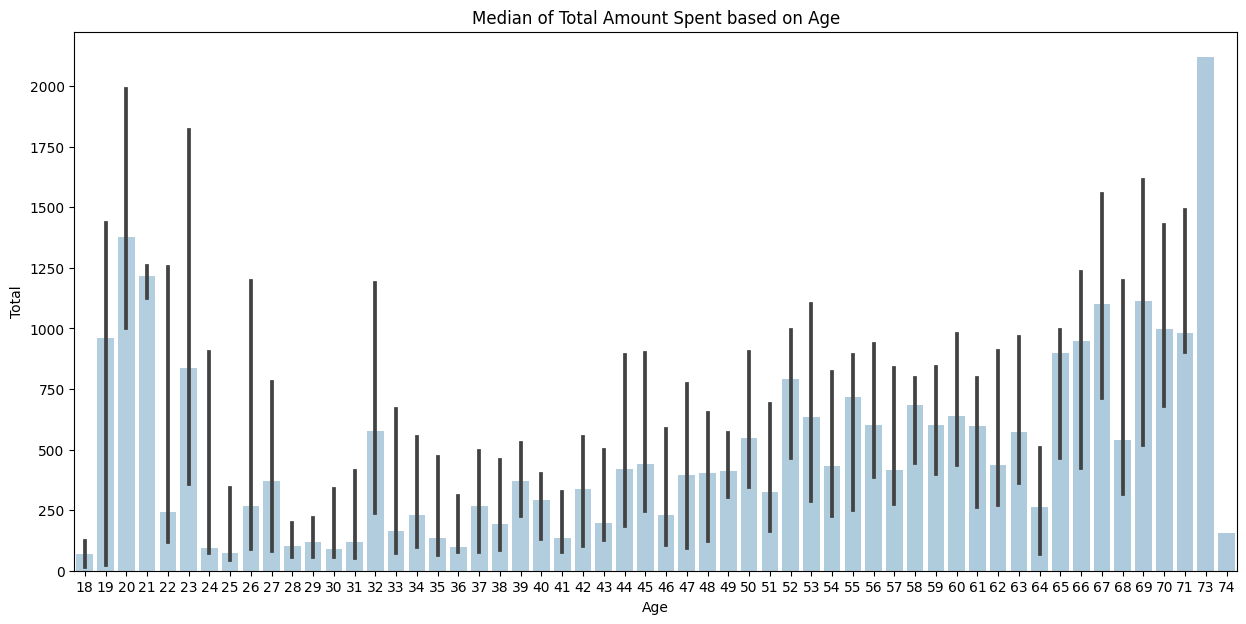

In [1542]:
plt.figure(figsize = (15,7))
pal  = sns.color_palette("Blues_d", len(df))
sns.barplot(data=df.sort_values('MntTotal', ascending=False), y = 'MntTotal', x = 'Age', estimator = np.median, palette = np.array(pal))
plt.title('Median of Total Amount Spent based on Age')
plt.xlabel('Age')
plt.ylabel('Total')
plt.show()

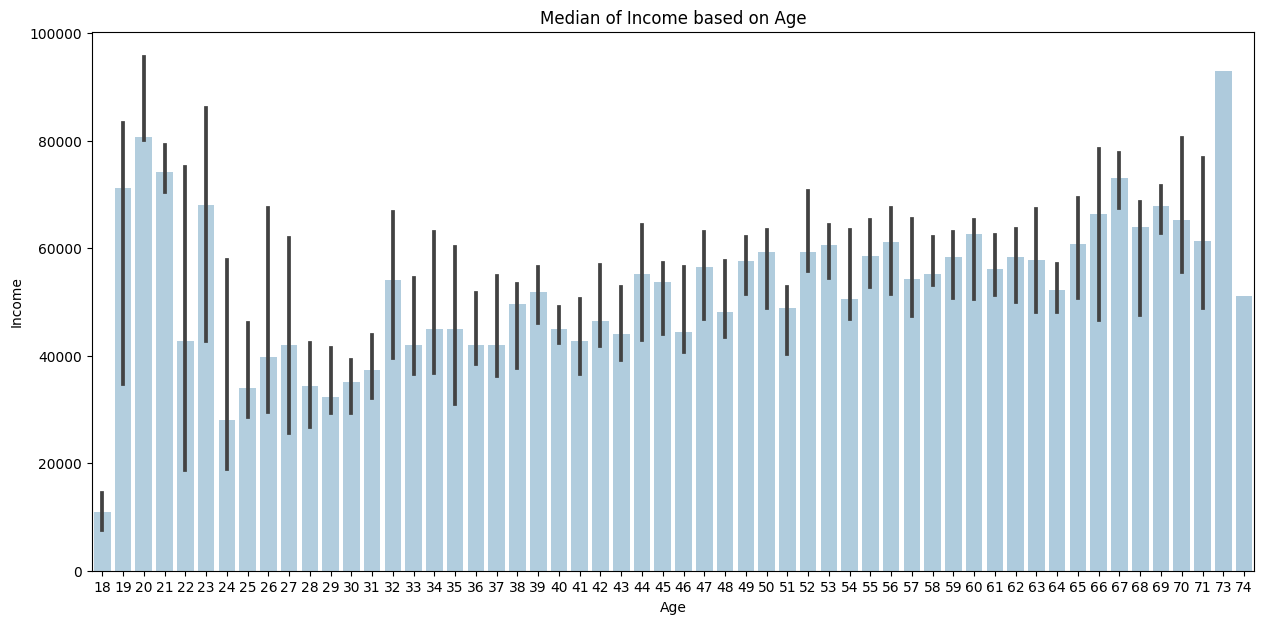

In [1543]:
plt.figure(figsize = (15,7))
pal  = sns.color_palette("Blues_d", len(df))
sns.barplot(data=df.sort_values('Income', ascending=False), y = 'Income', x = 'Age', estimator = np.median, palette = np.array(pal))
plt.title('Median of Income based on Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Skewness Check

In [1544]:
skew_df = pd.DataFrame(df.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(df[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,Year_Birth,-0.093344,0.093344,False
1,Income,0.347792,0.347792,False
2,Recency,-0.000688,0.000688,False
3,MntWines,1.170183,1.170183,True
4,MntFruits,2.102437,2.102437,True
5,MntMeatProducts,2.026188,2.026188,True
6,MntFishProducts,1.915259,1.915259,True
7,MntSweetProducts,2.101498,2.101498,True
8,MntGoldProds,1.836482,1.836482,True
9,NumDealsPurchases,2.413547,2.413547,True


The table above check the skewness of the Data distribution.

In [1545]:
df[['Age','Income', 'Children', 'MntTotal','NumDealsPurchases']].describe().applymap(lambda x: f"{x:0.1f}")


,Age,Income,Children,MntTotal,NumDealsPurchases
count,2212.0,2212.0,2212.0,2212.0,2212.0
mean,45.1,51958.8,0.9,607.3,2.3
std,11.7,21527.3,0.7,602.5,1.9
min,18.0,1730.0,0.0,5.0,0.0
25%,37.0,35233.5,0.0,69.0,1.0
50%,44.0,51371.0,1.0,397.0,2.0
75%,55.0,68487.0,1.0,1048.0,3.0
max,74.0,162397.0,3.0,2525.0,15.0


# Correlation

After pairing customer's background with Income and Total amount spent. Now we are going to analyse all of the parameters and the goal is gathering information about the parameters that matter the most when it comes to Total amount spent. 

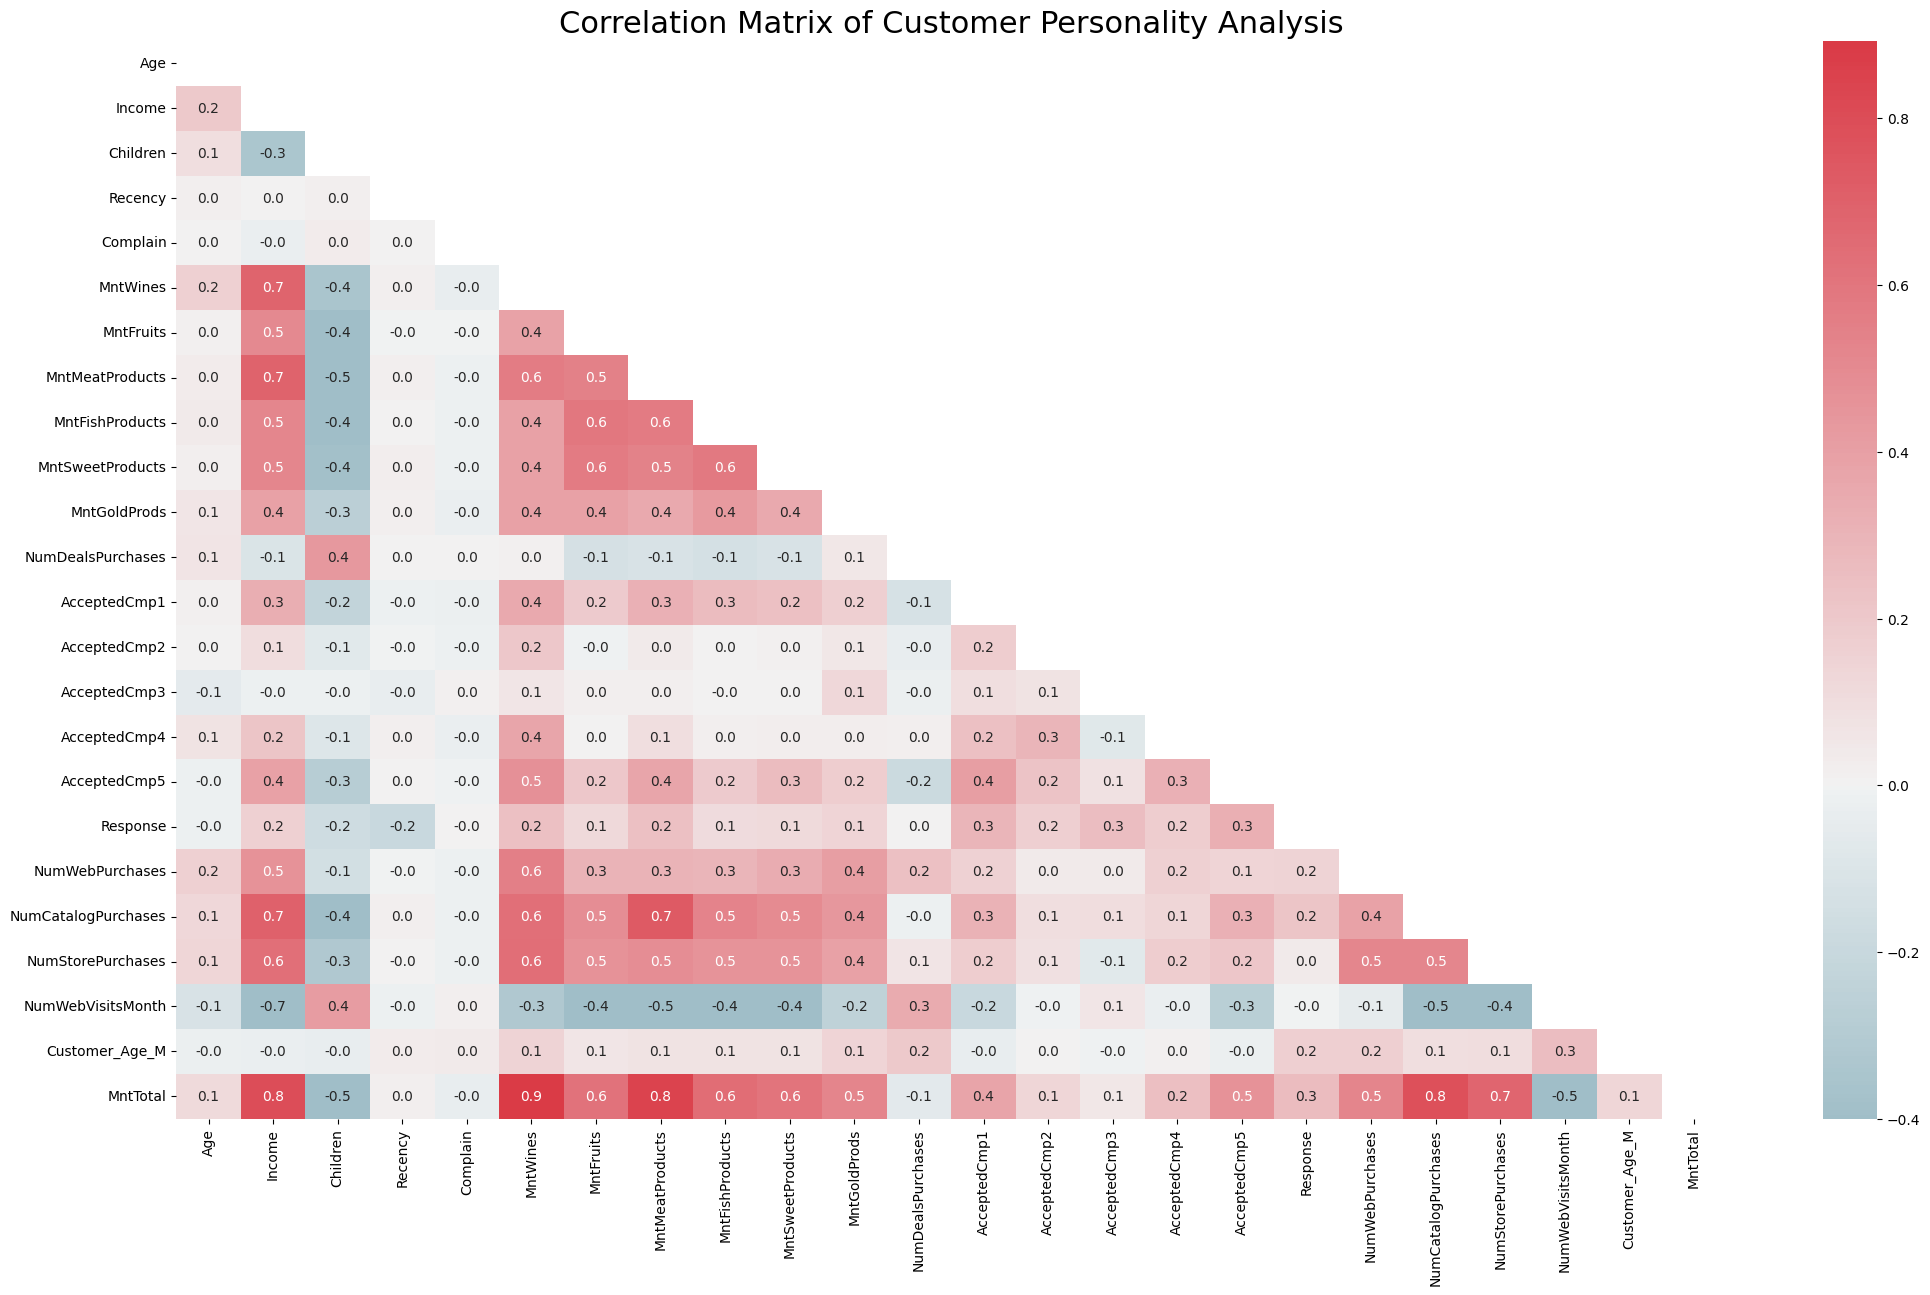

In [1546]:
to_corr = ['Age', 'Income', 'Children', 'Recency', 'Complain', 
          'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
          'MntGoldProds', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
          'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumWebPurchases', 'NumCatalogPurchases', 
          'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_Age_M', 'MntTotal']

cmap = sns.diverging_palette(220, 10, as_cmap=True)
matrix = np.triu(df[to_corr].corr())
plt.figure(figsize=(25, 14))
plt.title('Correlation Matrix of Customer Personality Analysis', fontsize=22)
sns.heatmap(df[to_corr].corr(), annot=True,
            fmt='.1f', vmin=-0.4, center=0, cmap=cmap, mask=matrix)

plt.show()

From the Correlation Matrix graph, it can be concluded that Total amount spent is closely related to customer's Income and the products that dominate the entire customer's market are Wine and Meat. Furthermore, it shows that the customers who purchase the products via Catalog channel tend to have a high Total amount spent.

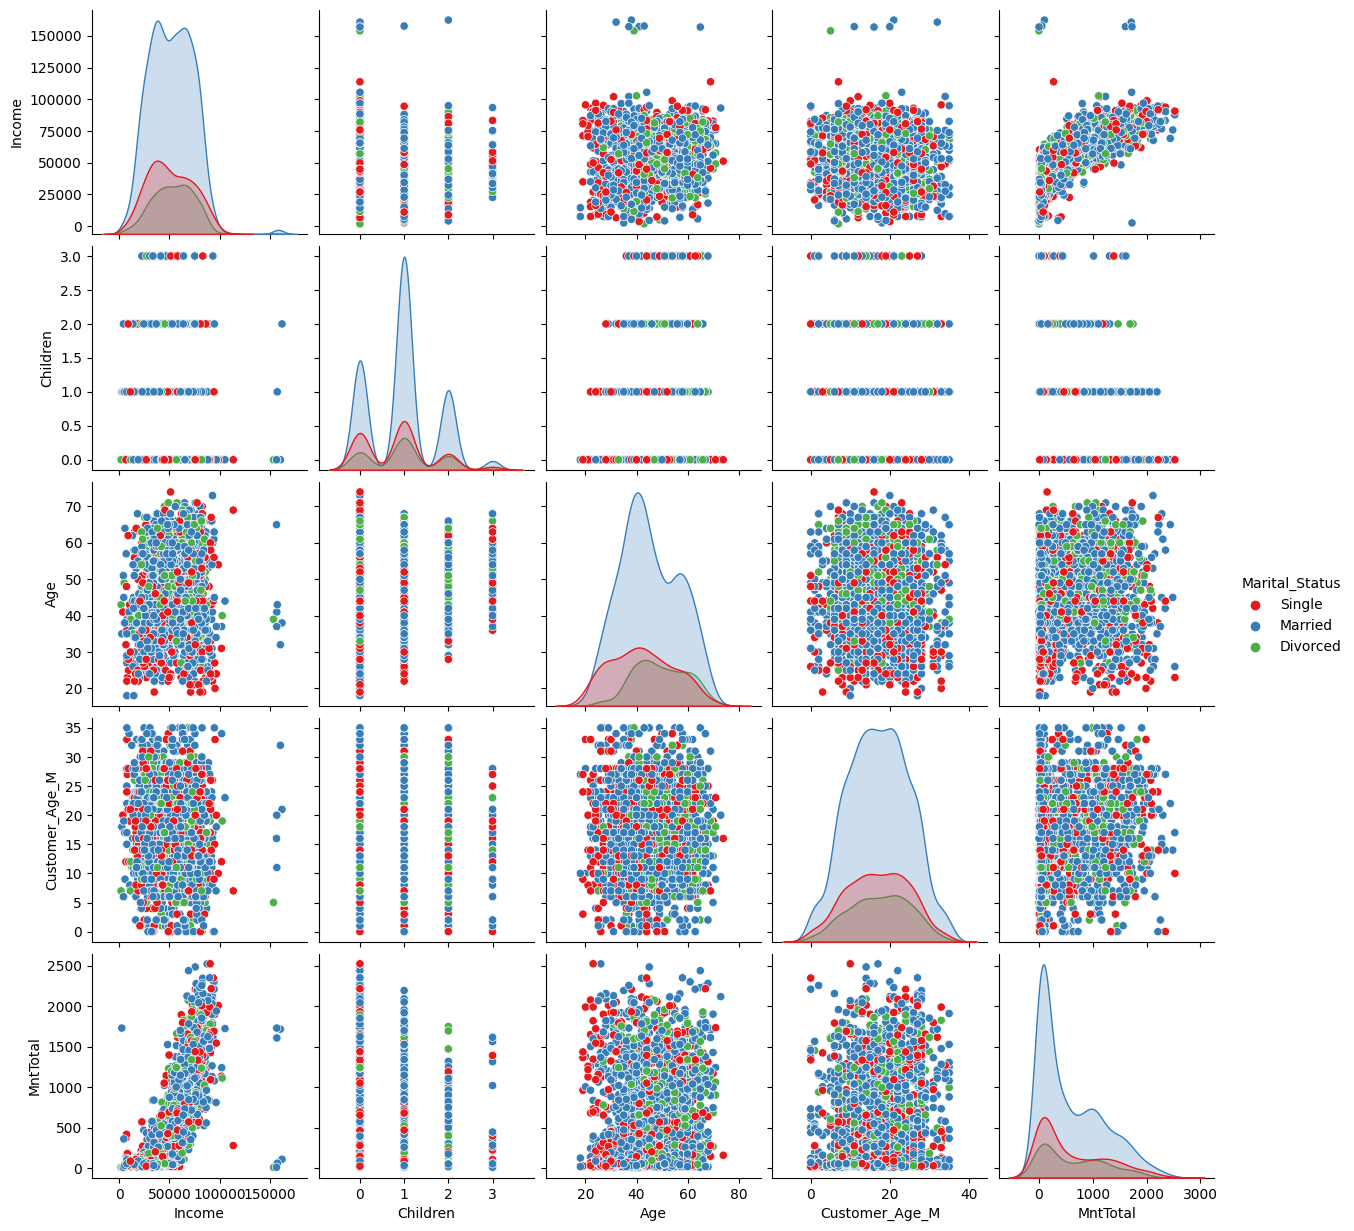

In [1547]:
to_plot = ['Income', 'Education', 'Children', 'Age', 'Customer_Age_M',
           'MntTotal', 'Marital_Status']
sns.pairplot(df[to_plot], hue='Marital_Status', palette='Set1')
plt.show()



From the graph above, it shows that the high profile customers (customer who has high Income and high Total amount spent) are married. They are dominating in every aspect.

# Marketing Campaign Analysis

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


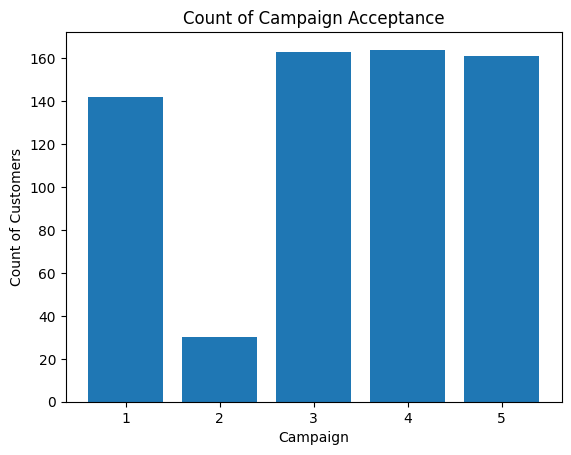

In [1548]:
promotion = ['1','2','3','4','5']
sumpromotion = [df['AcceptedCmp1'].sum(),df['AcceptedCmp2'].sum(),df['AcceptedCmp3'].sum(),df['AcceptedCmp4'].sum(),df['AcceptedCmp5'].sum()]
plt.bar(promotion, sumpromotion)
plt.title('Count of Campaign Acceptance')
plt.ylabel('Count of Customers')
plt.xlabel('Campaign')
plt.show()

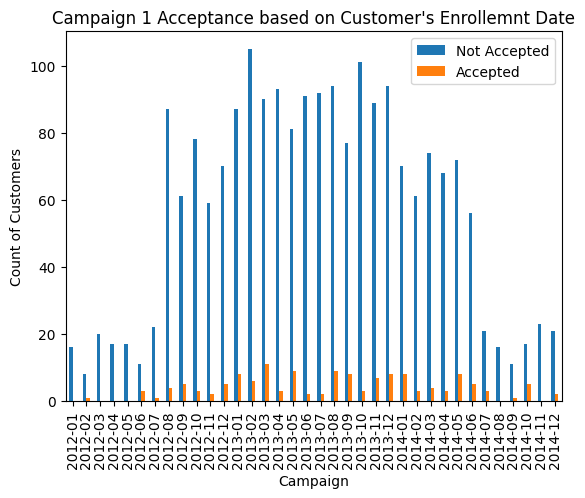

In [1549]:
# plt.figure(figsize = (20,100))
df_am1=pd.crosstab(df['Month'],df['AcceptedCmp1'])
barplot = df_am1.plot.bar(rot = 0)
plt.xticks(rotation = 90)
plt.title('Campaign 1 Acceptance based on Customer\'s Enrollemnt Date')
plt.ylabel('Count of Customers')
plt.xlabel('Campaign')
plt.legend(['Not Accepted','Accepted'])
plt.show()

In [1550]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['AcceptedCmp1']==i]['Customer_Age_M'] for i in df['AcceptedCmp1'].unique()], alternative='less')
if pval <= 0.05:
    print('Refuse Ho')
else:
    print('Fail to Refuse Ho')

Fail to Refuse Ho


In [1551]:
am1 = (df['AcceptedCmp1'].sum() / len(df))*100
print(f'The acceptance rate for campaign 1 is {am1:0.1f} %')

The acceptance rate for campaign 1 is 6.4 %


Fail to refuse Ho from the earlier Customer Age analysis, so the Customer Age distribution is non normal. The Customer Age is define by how long (in month) the customer's have been enrolled.

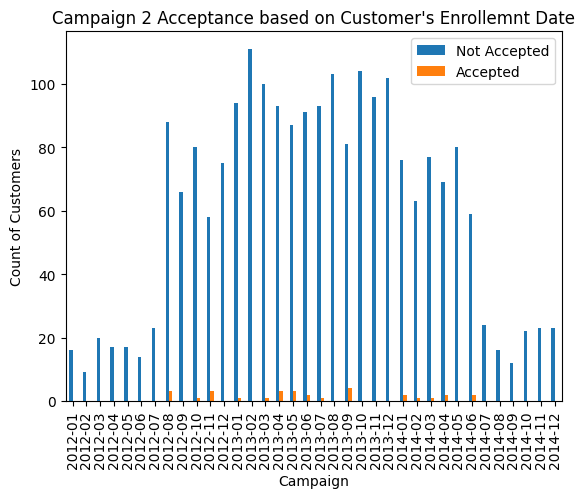

In [1552]:
df_am2=pd.crosstab(df['Month'],df['AcceptedCmp2'])
barplot = df_am2.plot.bar(rot = 0)
plt.xticks(rotation = 90)
plt.title('Campaign 2 Acceptance based on Customer\'s Enrollemnt Date')
plt.ylabel('Count of Customers')
plt.xlabel('Campaign')
plt.legend(['Not Accepted','Accepted'])
plt.show()

In [1553]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['AcceptedCmp2']==i]['Customer_Age_M'] for i in df['AcceptedCmp2'].unique()], alternative='less')
if pval <= 0.05:
    print('Refuse Ho')
else:
    print('Fail to Refuse Ho')

Fail to Refuse Ho


In [1554]:
am2 = (df['AcceptedCmp2'].sum() / len(df))*100
print(f'The acceptance rate for campaign 2 is {am2:0.1f} %')

The acceptance rate for campaign 2 is 1.4 %


<Figure size 2000x1000 with 0 Axes>

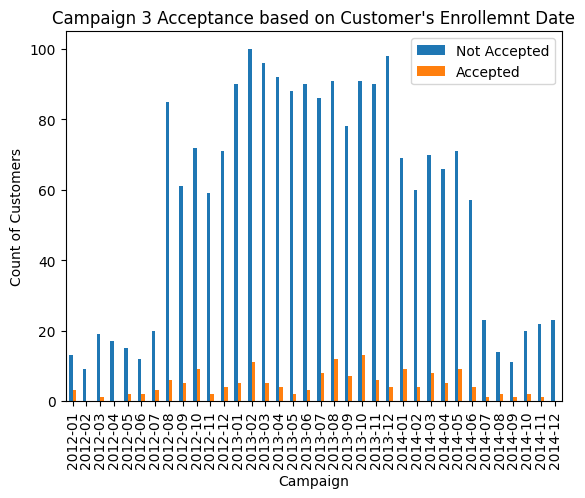

In [1555]:
df_am3=pd.crosstab(df['Month'],df['AcceptedCmp3'])
plt.figure(figsize = (20,10))
barplot = df_am3.plot.bar(rot = 0)
plt.xticks(rotation = 90)
plt.title('Campaign 3 Acceptance based on Customer\'s Enrollemnt Date')
plt.ylabel('Count of Customers')
plt.xlabel('Campaign')
plt.legend(['Not Accepted','Accepted'])
plt.show()

In [1556]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['AcceptedCmp3']==i]['Customer_Age_M'] for i in df['AcceptedCmp3'].unique()], alternative='less')
if pval <= 0.05:
    print('Refuse Ho')
else:
    print('Fail to Refuse Ho')

Fail to Refuse Ho


In [1557]:
am3 = (df['AcceptedCmp3'].sum() / len(df))*100
print(f'The acceptance rate for campaign 3 is {am3:0.1f} %')

The acceptance rate for campaign 3 is 7.4 %


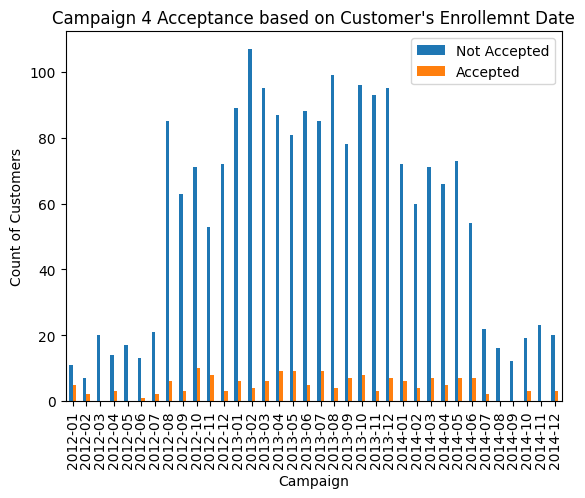

In [1558]:
df_am4=pd.crosstab(df['Month'],df['AcceptedCmp4'])
barplot = df_am4.plot.bar(rot = 0)
plt.xticks(rotation = 90)
plt.title('Campaign 4 Acceptance based on Customer\'s Enrollemnt Date')
plt.ylabel('Count of Customers')
plt.xlabel('Campaign')
plt.legend(['Not Accepted','Accepted'])
plt.show()

In [1559]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['AcceptedCmp4']==i]['Customer_Age_M'] for i in df['AcceptedCmp4'].unique()], alternative='less')
if pval <= 0.05:
    print('Refuse Ho')
else:
    print('Fail to Refuse Ho')

Fail to Refuse Ho


In [1560]:
am4 = (df['AcceptedCmp4'].sum() / len(df))*100
print(f'The acceptance rate for campaign 4 is {am4:0.1f} %')

The acceptance rate for campaign 4 is 7.4 %


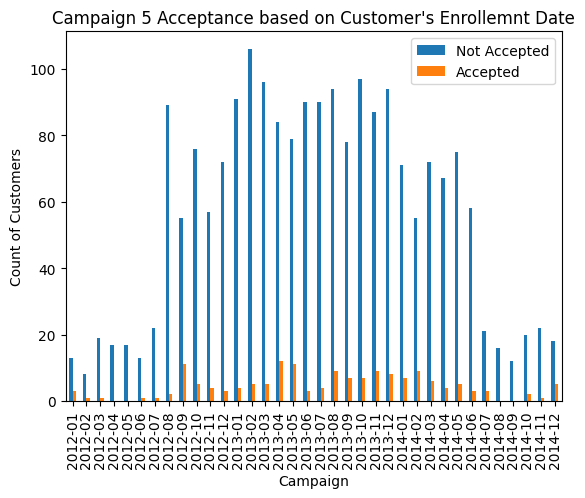

In [1561]:
df_am5=pd.crosstab(df['Month'],df['AcceptedCmp5'])
barplot = df_am5.plot.bar(rot = 0)
plt.xticks(rotation = 90)
plt.title('Campaign 5 Acceptance based on Customer\'s Enrollemnt Date')
plt.ylabel('Count of Customers')
plt.xlabel('Campaign')
plt.legend(['Not Accepted','Accepted'])
plt.show()

In [1562]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['AcceptedCmp5']==i]['Age'] for i in df['AcceptedCmp5'].unique()], alternative='less')
if pval <= 0.05:
    print('Refuse Ho')
else:
    print('Fail to Refuse Ho')

Fail to Refuse Ho


In [1563]:
am5 = (df['AcceptedCmp5'].sum() / len(df))*100
print(f'The acceptance rate for campaign 5 is {am5:0.1f} %')

The acceptance rate for campaign 5 is 7.3 %


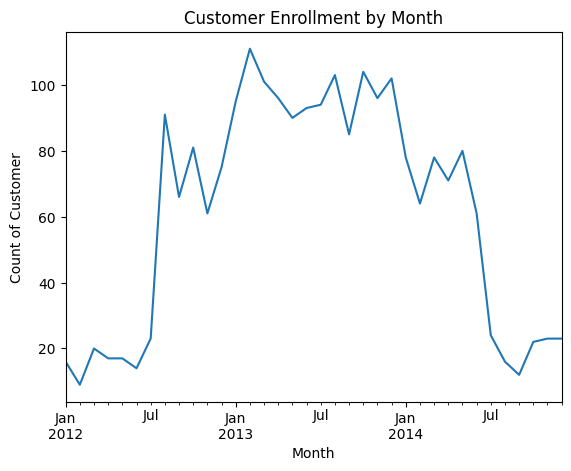

In [1564]:
df.groupby('Month')['Customer_Age_M'].count().plot()
plt.title('Customer Enrollment by Month')
plt.ylabel('Count of Customer')
plt.show()


The Graph shows that there is a positive trend of customer growth and it stays consistent from August 2012 to June 2014.

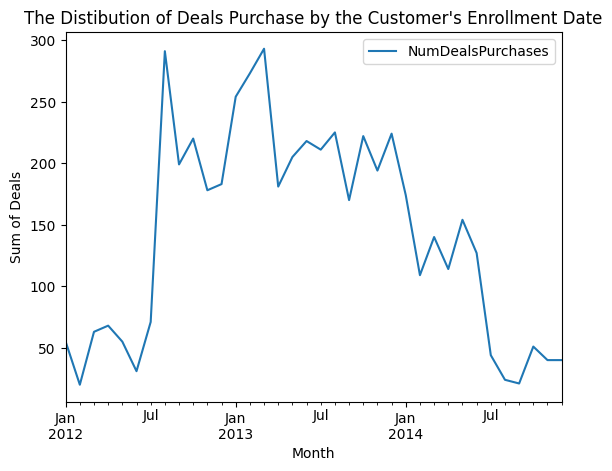

In [1565]:
df.groupby('Month')['Month','NumDealsPurchases'].sum().plot()
plt.title('The Distibution of Deals Purchase by the Customer\'s Enrollment Date')
plt.ylabel('Sum of Deals')
plt.show()


The graphs above shows that the customers who use the deals are mostly customers who are enrolled in August 2012 - June 2014. It share a quite similar trend to Customer Enrollment by Month graph.

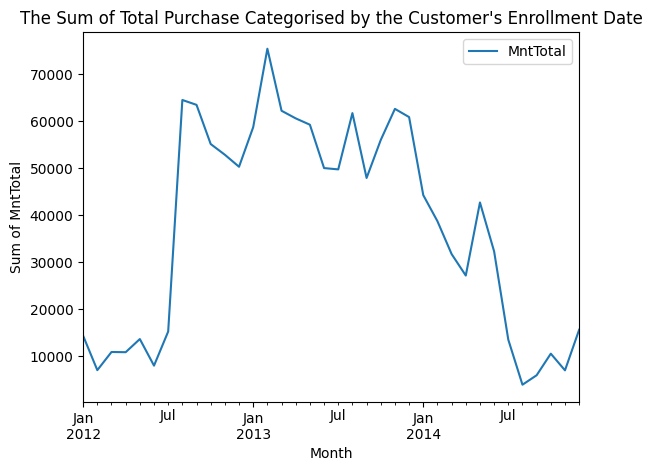

In [1566]:
df.groupby('Month')['Month','MntTotal'].sum().plot()
plt.title('The Sum of Total Purchase Categorised by the Customer\'s Enrollment Date')
plt.ylabel('Sum of MntTotal')
plt.show()

The graphs above shows that sum of sales categorised by the enrollment date are majorly from the customers who are enrolled in August 2012 - June 2014. It share a quite similar trend to the last two graphs.

# Key Takeaways

The accepted campaign rate is ~6% on average (6%, 1%, 7%, 7%, 7%). Based on the average conversion rate for marketing campaign in e-commerce industry which is 3.71%. So the campaigns can be considered as succesful. [Source](https://popupsmart.com/blog/what-is-a-good-conversion-rate).

Even though the campaign can be considered successful there are some improvements that can be implemented to enhance the effectivity of the marketing campaign. Beforehand, we will elaborate the condition of the existing marketing campaign data (`AcceptedCmp1-5`). Here are few conditions:
* There is no explanation what is the `AcceptedCmp1-5` about and the differences between them
* Since there is no explanation about each marketing campaign, the goal of the campaign is remain unknown
* The current marketing campaign does not time-boung, meaning that there is no information about what the campaign starts and ends
However, these conditions can be intenioally implemented to follow company's regulation and/or country's regulation.


These are few suggestions to improve the marketing campaign:
1. For customer's retention campaign, the company's can focus on customers that have high Income, big spending amount on Wine and Meat (based on historical Data) and using catalog as the channel of purchase. (Reference: Correlation Matrix)
2. The trend of Customer Enrollment by Month, The Distribution of Deals Purchase by Customer's Enrollment Date and The Sum of Total Purchase by Customer's Enrollment date showing the similar trend, meaning that these customers are the most active and also well the most well-informed customer in terms of promotion. In Addition, this customer group is also the majority of customer who accepted the marketing campaign (Reference: Accepted Campaign 1-5 based on Customer's Enrollment Date graph)
3. **If possible** create an marketing campaign for acquiring new customers, the backgrounds for this potential customer are:
    * Married
    * Education background: Graduation, Master, and PhD
    Reference: Pair Plot Graph and Customer's Background Overview
4. The marketing campaign for customer's retention and acquiring new customer should not only provide discount to trigger the purchase and also customer's enrollment (for the latter) but also it should have a time span for the marketing campaign. For example Year End Sale (29 Dec - 2 Jan) or a more thematic campaign such as 11.11 or CNY (22 Jan). By adding time-bound characteristics, it is easier to use for further analysis.



